# Car Accident Severity Capstone Projet (Week 1)

## Table of contents
* [Introduction: Description of the Problem](#introduction)
* [Data](#data)
    * [Undertanding the Data](#undertanding)
    * [Evolution of the Accidents in Time](#evolution)

## Introduction: Description of the Problem <a name="introduction"></a>

In this project a model to predict the **probability** of having a **car accident** and to classify **its severity** will be build up. In order to do so, the city of **Seattle** will be used as an **example**. A database containing information about car accidents in Seattle will be used to feed the model.

The **stakeholders** of this project will be **drivers** using their vehicles in Seattle and its surroundings. Of course, this project may also interest app developers which may use this example an extrapolate it to other cities and/or states.

The main idea behind this project is quite simple: "**_forcasting car accidents is the best way to avoid them_**".

In [1]:
# The first thing we need to do is importing two of the most important libraries 
# required in almost every data science project: "Pandas and Numpy"

import pandas as pd
import numpy as np

## Data <a name="data"></a>

The data that will be used in this project comes from the **_Traffic Management Division of Seattle_**. A raw database in a form of a **CSV file** will be downloaded from: "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv". This **database contains** precious information about all registered **car accidents in Seattle from 2004 to Present**.

In [2]:
csv_file = "Data-Collisions.csv"
df = pd.read_csv(csv_file, low_memory=False)

### Undertanding the Data <a name="understanding"></a>

In [3]:
df.shape

(194673, 38)

The raw database comes as a **CSV file** containing **194673** entries (car accidents in Seattle) and **38** attributes with several redundant data (columns) that will not be used to build the model. The target of our model will be the "**severity**" of the possible car accident. 

In [4]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [5]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [6]:
df['SEVERITYCODE.1'].value_counts().to_frame() # The "SEVERITYCODE" and "SEVERITYCODE.1" columns contain the same
                                               # information in the from of a numerical code: 1) for property damage
                                               # and 2) for human injury.

,SEVERITYCODE.1
1,136485
2,58188


The problem has been already simplified, the raw database has only **two different values to describe the severity**:

   **1) Property Damage Only Collision** 136485 accidents representing _ca_. 70% of the data.
   
   **2) Injury Collision** 58188 accidents representing _ca_. 30% of the data.

The dataset includes the following fields:

In [7]:
df.dtypes.to_frame()

,0
SEVERITYCODE,int64
X,float64
Y,float64
OBJECTID,int64
INCKEY,int64
COLDETKEY,int64
REPORTNO,object
STATUS,object
ADDRTYPE,object
INTKEY,float64


Only few of the database attributes (columns) are relevant for the prediction of the probability of having an accident and the severity of it, namely:

* the condition of the road during the accident (**ROADCOND** attribute)
* the weather conditions during the time of the accident (**WEATHER** attribute)
* the light conditions during the accident (**LIGHTCOND** attribute)
* category of junction at which the accident took place (**JUNCTIONTYPE** attribute)
* longitude (**X** attribute)
* latitude (**Y** latitude)

As a starting point, the attributes above will be used as main independent variables to build up our predicting model. Then, other parameters such as the **time of the accident** (**INCDTTM**) will be included in the model in order to explore possible improvements. 

During the dataset preparation and cleaning, in order to remove possible biases in our model some of the entries containing positive (**true**) parameters such as **inattention** (**INATTENTIONIND** attribute), **speeding** (**SPEEDING** attribute) or **drug influence** (**UNDERINFL** attribute) will be removed. The effect of removing or filling data for the entries missing important attributes such as ROADCOND (with 5012 empty entries _ca_. 3% of the dataset) will be analysed when the model will be built.

### Evolution of the Car Accidents in Time <a name="evolution"></a>

One of the first things that we need to verify is the evolution of accidents in time. In principle, over the years the quality of the streets, roads and even the cars themself may have improved, thus, driving might have become safer and less accident may have happended in the last years. We can verify this hypothesis looking at the trend of car accidents in the last few years with a horizontal bar chart.

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

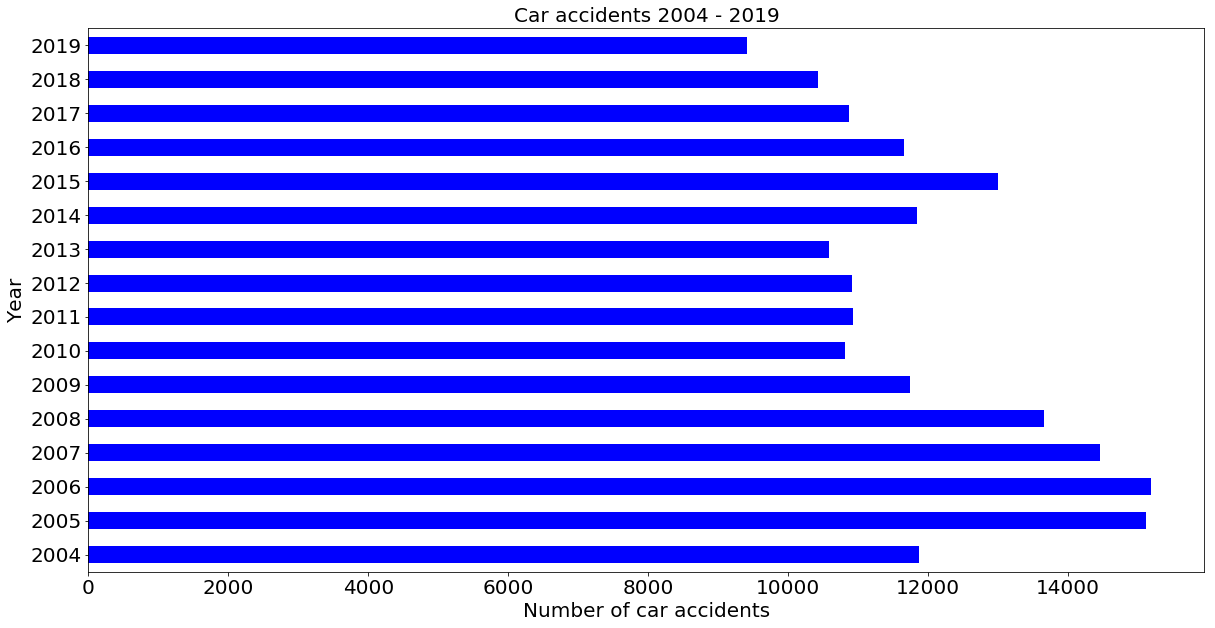

In [10]:
years = [] ; total_num = []
for x in range(2004, 2020):
    years.append(x)
    total=df['INCDATE'].str.count(str(x)).sum()
    total_num.append(total)

plot_barh = pd.DataFrame(years, total_num)

plot_barh = pd.DataFrame(total_num, years)
plot_barh.plot(kind='barh', figsize=(20,10), color='blue', fontsize=20, legend=False)
plt.xlabel('Number of car accidents', fontsize=20)
plt.ylabel('Year', fontsize=20)
plt.title('Car accidents 2004 - 2019', fontsize=20)
plt.show()

As it can be observed in the horizontal bar chart above, the car accidents have decreased in the last decade. However, this decreasing trend might not be significant enough to discard the entries from the 2000's decade, thus, all the years will be taken into account in order to construct the predicting severity model.